In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
maxAll = df.max()
minAll = df.min()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY, maxAll, " ", minAll, sep = '\n')

2.3134926739926738
2.4922985347985356
4.6584212454212475
1.741797285664983
0.8110039291512505
1.6652150617992907
MLOGP                             9.148
RDCHI                             6.439
quantitative response of LC50    10.047
dtype: float64
 
MLOGP                           -6.446
RDCHI                            1.000
quantitative response of LC50    0.122
dtype: float64


In [4]:
df1 = df.copy()
df1

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [5]:
df['MLOGP'] = (df['MLOGP'] - df['MLOGP'].min())/(df['MLOGP'].max() - df['MLOGP'].min())
df['RDCHI'] = (df['RDCHI'] - df['RDCHI'].min())/(df['RDCHI'].max() - df['RDCHI'].min())
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [6]:
print(df.max(), df.min(), sep = '\n')
df

MLOGP                             1.000
RDCHI                             1.000
quantitative response of LC50    10.047
dtype: float64
MLOGP                            0.000
RDCHI                            0.000
quantitative response of LC50    0.122
dtype: float64


,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [7]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [8]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
109,0.569386,0.352087,8.564
353,0.547134,0.267512,3.047
222,0.698859,0.342342,6.508
315,0.509940,0.157566,5.371
40,0.625369,0.336827,4.301
...,...,...,...
430,0.598820,0.457253,3.619
231,0.556111,0.073727,3.339
333,0.474734,0.889686,4.566
384,0.613890,0.288656,5.380


In [9]:
test

,MLOGP,RDCHI,quantitative response of LC50
345,0.393485,0.168781,4.221
81,0.559189,0.211436,3.700
385,0.370720,0.133480,3.589
193,0.602026,0.169884,3.524
43,0.538220,0.184777,3.061
...,...,...,...
79,0.645376,0.403935,4.878
334,0.418238,0.154440,3.788
199,0.649160,0.247104,4.980
86,0.597345,0.385181,6.188


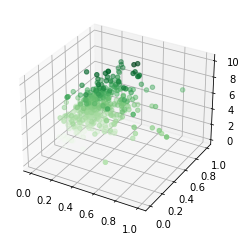

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [11]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
109,0.352087,0.569386
353,0.267512,0.547134
222,0.342342,0.698859
315,0.157566,0.509940
40,0.336827,0.625369
...,...,...
430,0.457253,0.598820
231,0.073727,0.556111
333,0.889686,0.474734
384,0.288656,0.613890


In [12]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
109,8.564
353,3.047
222,6.508
315,5.371
40,4.301
...,...
430,3.619
231,3.339
333,4.566
384,5.380


In [13]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.35208678065820925


In [14]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
345,0.168781,0.393485
81,0.211436,0.559189
385,0.133480,0.370720
193,0.169884,0.602026
43,0.184777,0.538220
...,...,...
79,0.403935,0.645376
334,0.154440,0.418238
199,0.247104,0.649160
86,0.385181,0.597345


In [15]:
testY

,quantitative response of LC50
345,4.221
81,3.700
385,3.589
193,3.524
43,3.061
...,...
79,4.878
334,3.788
199,4.980
86,6.188


In [16]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
0.16878102592388305


In [17]:
iters = 10000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [18]:
TrainErr = np.array([])
TestErr = np.array([])

w0 = 4.6977568807339445


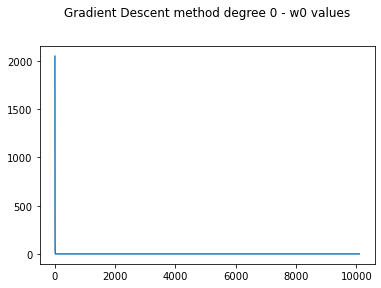

In [19]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.sum(valY-w))
    #print(w1,w)

    counter+=1
    costArr[counter] = (np.sum(valY-w))
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 0 - w0 values", y = 1, pad = 30)
plt.show() 

In [20]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,0]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.4352802204465125

In [21]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1842428383107861

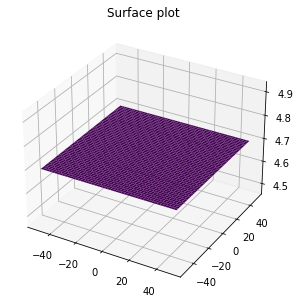

In [22]:
degree = 0
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
k=0
z = w*(x**k)*(y**k)
        

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [23]:
degree = 1

In [24]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.001733553842826
w1=1.4382395064070155
w2=2.373853649314195


436

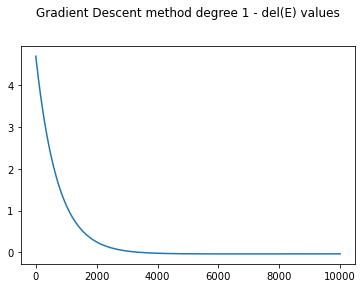

In [25]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [26]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.1349856742194513

In [27]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.9009016726364467

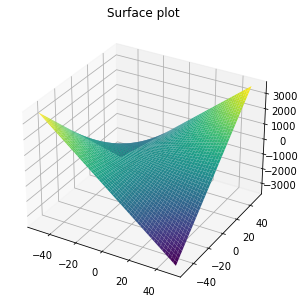

In [28]:
x = np.arange(-50,50,0.1)
y = x[::-1].copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [29]:
degree = 2

In [30]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.6450378406500956
w1=1.1584999844611275
w2=1.9959013918492485
w3=0.4183165734222168
w4=0.8027052538328868
w5=1.4454057877249937


436

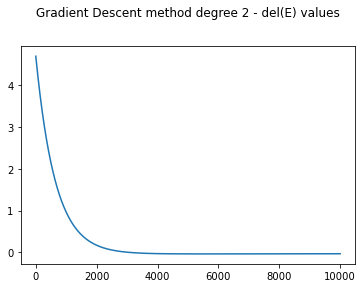

In [31]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [32]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0438961984730353

In [33]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.8085964778435186

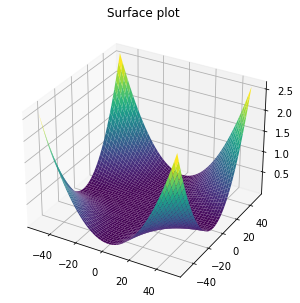

In [34]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [35]:
degree = 3

In [36]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5653679098822844
w1=1.0559369349584835
w2=1.859374533704642
w3=0.35467192472427095
w4=0.7100293788131306
w5=1.3088368894382598
w6=0.0982384690567417
w7=0.2395827713122551
w8=0.475019597912684
w9=0.9107258637737536


436

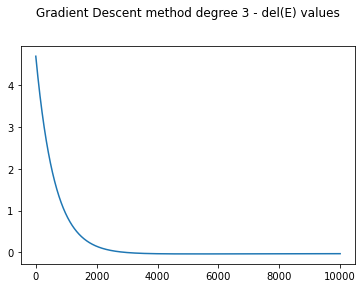

In [37]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [38]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0177583786787805

In [39]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7771548153512952

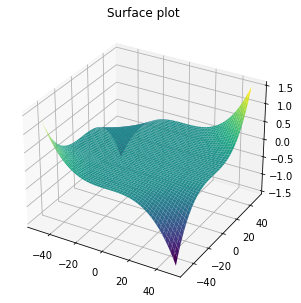

In [40]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [41]:
degree = 4

In [42]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.552732379329021
w1=1.017101398004268
w2=1.8064598486288304
w3=0.32843426506929435
w4=0.6694177005344655
w5=1.2481556054709955
w6=0.08140398970248021
w7=0.21476160075700865
w8=0.43804643517465913
w9=0.8536273694069371
w10=-0.0062948884925679
w11=0.0533317883600753
w12=0.13549432621953153
w13=0.2845796994267207
w14=0.5805724534462507


436

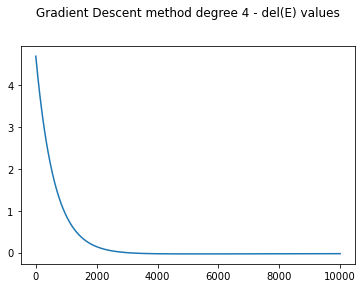

In [43]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [44]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.010828897114815

In [45]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7655157666287042

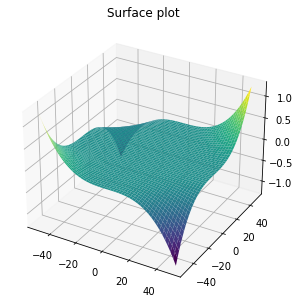

In [46]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [47]:
degree = 5

In [48]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.555239308715942
w1=1.00254990917683
w2=1.785360967023091
w3=0.3177079096152676
w4=0.6512996132101072
w5=1.2204908457233195
w6=0.07430406201706749
w7=0.20306482529894776
w8=0.42014295835192456
w9=0.8259294690789336
w10=-0.011069203096802411
w11=0.0455955874914294
w12=0.1242489831739766
w13=0.26805566759393024
w14=0.5551221402336919
w15=-0.039860830576839895
w16=-0.009356818050819992
w17=0.02188313179605201
w18=0.0708988237165256
w19=0.16704441035612802
w20=0.3700106135222891


436

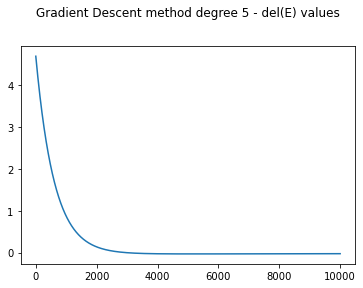

In [49]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [50]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0094191918924587

In [51]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7611667715155993

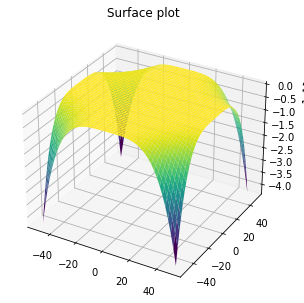

In [52]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [53]:
degree = 6

In [54]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.559705356419205
w1=0.9975683584419363
w2=1.776999995755887
w3=0.31364619849711695
w4=0.6433161329304836
w5=1.2078446521805049
w6=0.07157115480842537
w7=0.19764142332109214
w8=0.41151224695682664
w9=0.8125025348530757
w10=-0.012862498073813048
w11=0.041880356261787835
w12=0.11856423577585089
w13=0.25965156816486235
w14=0.5422824573310592
w15=-0.041020247573172214
w16=-0.012000435945240848
w17=0.017913660222743343
w18=0.06534095675432304
w19=0.15915529010053708
w20=0.3581966326848148
w21=-0.0483333025429691
w22=-0.029457177735808325
w23=-0.015911902896796972
w24=0.0002358508393163439
w25=0.02935680269202009
w26=0.09191257551293282
w27=0.2322988003902579


436

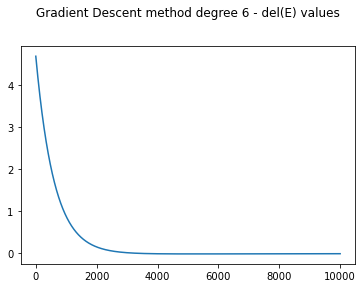

In [55]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [56]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.009275886493912

In [57]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7597186822382515

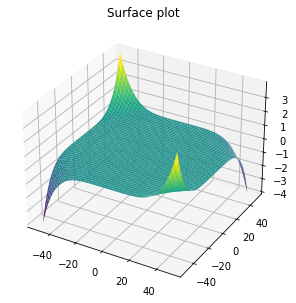

In [58]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [59]:
degree = 7

In [60]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5631509522109184
w1=0.9963864075044032
w2=1.7738618928591092
w3=0.3125111241909487
w4=0.6400351268339346
w5=1.2022248984415622
w6=0.07085262033072309
w7=0.19532245270317272
w8=0.4075298940054796
w9=0.8061788461242801
w10=-0.013243044694076398
w11=0.040255833822879054
w12=0.11583739339318398
w13=0.25554323825588693
w14=0.5360057792682075
w15=-0.04115452557074792
w16=-0.01316329439502827
w17=0.01595064674010079
w18=0.06251964346527845
w19=0.15514967825532328
w20=0.35225147110352883
w21=-0.048286547402092775
w22=-0.030299610732021323
w23=-0.017384271770664785
w24=-0.0018347517254911495
w25=0.026565501958105083
w26=0.08808530494553382
w27=0.22676142456233062
w28=-0.04758656415024698
w29=-0.034024200956149615
w30=-0.027073787115319926
w31=-0.021999299650756813
w32=-0.014544764824692103
w33=0.00216639527453728
w34=0.04275178263024625
w35=0.14035732425463193


436

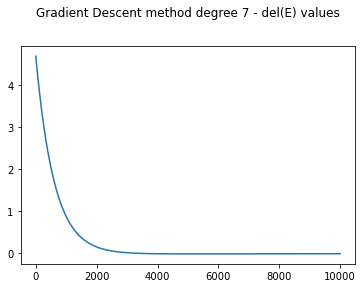

In [61]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [62]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0090950922650577

In [63]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7594192698987373

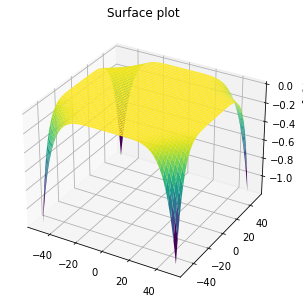

In [64]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [65]:
degree = 8

In [66]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5652566834373145
w1=0.9966642966343354
w2=1.7728592773574474
w3=0.3126621863341756
w4=0.6389740245614554
w5=1.1999459659701033
w6=0.07107368840867496
w7=0.19458075344453013
w8=0.4059329358757066
w9=0.8034540397646706
w10=-0.012944252221846567
w11=0.03975268318003508
w12=0.11472945782769046
w13=0.25376240490922636
w14=0.5332068286131281
w15=-0.04079187004021014
w16=-0.013501044254306016
w17=0.015143270257107804
w18=0.061272468697001606
w19=0.15333854149706636
w20=0.3495344354220397
w21=-0.047873377979403754
w22=-0.030517275276567238
w23=-0.017992611575767488
w24=-0.002766416508333708
w25=0.02527783948736608
w26=0.08630683117999205
w27=0.22418161204711967
w28=-0.04713367957333932
w29=-0.03415074624028402
w30=-0.02753905064644348
w31=-0.02272204510739475
w32=-0.015522332455861534
w33=0.0008797862078872153
w34=0.041027745668498775
w35=0.13792419154980642
w36=-0.04357753350960145
w37=-0.03280962008294472
w38=-0.02850164020617778
w39=-0.027216153078304973
w40=-0.026735200764144464
w41=-

436

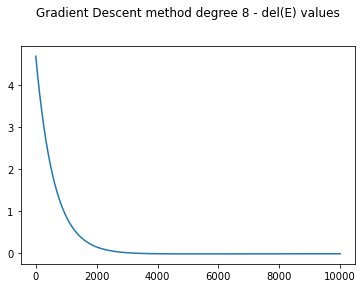

In [67]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [68]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.008552724444473

In [69]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.759524966651738

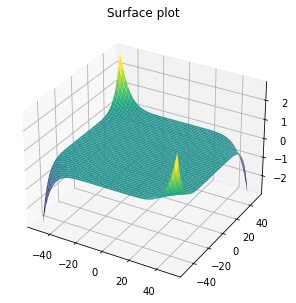

In [70]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [71]:
degree = 9

In [72]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.566298785818406
w1=0.9974397702933523
w2=1.7726945076560034
w3=0.31335950689474473
w4=0.638964191084088
w5=1.1992619424531277
w6=0.07172638539224917
w7=0.19465397857504324
w8=0.40558009850363735
w9=0.8025718104121808
w10=-0.012322668792190905
w11=0.03986420331830764
w12=0.11452736442751572
w13=0.25326636089101007
w14=0.5322746301241428
w15=-0.040192611955924974
w16=-0.01336872172798069
w17=0.015016496939012261
w18=0.06094963799080645
w19=0.1527902002205756
w20=0.34861775376742044
w21=-0.04729059560707455
w22=-0.03037083688754095
w23=-0.0180741528187238
w24=-0.002999141862901879
w25=0.02490392203722212
w26=0.0857470442934356
w27=0.22330631965922318
w28=-0.046563630120434935
w29=-0.03399338090498363
w30=-0.02758879961300566
w31=-0.02289851435279669
w32=-0.01580206510780808
w33=0.00048637929793789836
w34=0.040474082240592936
w35=0.13709747080005663
w36=-0.04301785090789493
w37=-0.03264344519578293
w38=-0.02852696318601847
w39=-0.02735234976463808
w40=-0.026954248902412065
w41=-0.0248

436

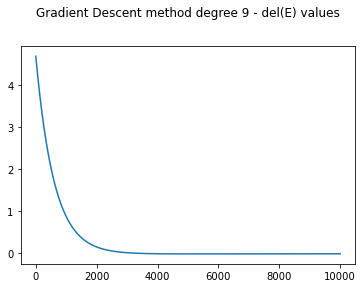

In [73]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [74]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.015297491146683

In [75]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.5194440945338976

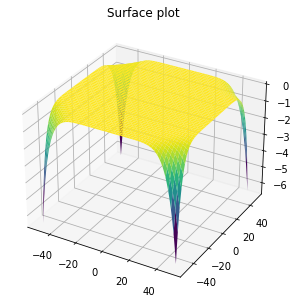

In [76]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**k)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [77]:
TrainErr

array([1.43528022, 1.13498567, 1.0438962 , 1.01775838, 1.0108289 ,
       1.00941919, 1.00927589, 1.00909509, 1.00855272, 1.00764875])

In [78]:
TestErr

array([1.18424284, 0.90090167, 0.80859648, 0.77715482, 0.76551577,
       0.76116677, 0.75971868, 0.75941927, 0.75952497, 0.75972205])

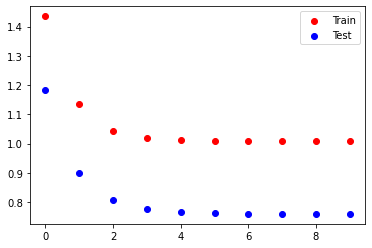

In [79]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [80]:
iters = 300000
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [81]:
TrainErr = np.array([])
TestErr = np.array([])

In [82]:
k = np.random.randint(low = 0, high = np.shape(valX)[0])
k

275

In [83]:
degree = 0

In [84]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=4.904955914508465


436

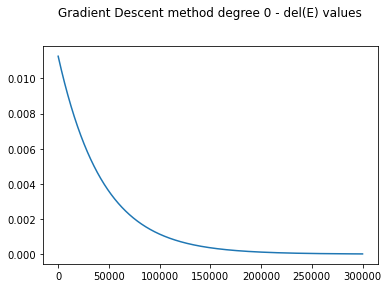

In [85]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [86]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.913491880490117

In [87]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

2.492327423015307

In [88]:
degree = 1

In [89]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.6216820830329106
w1=1.094694860177682
w2=1.8617034486079838


436

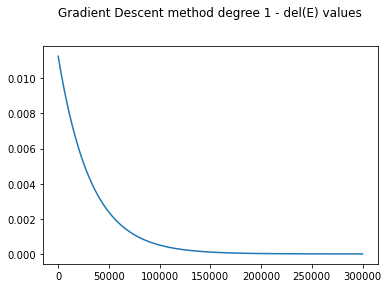

In [90]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [91]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.450984569155567

In [92]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

2.0655778912168636

In [93]:
degree = 2

In [94]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.3676750263262747
w1=1.0179183201471782
w2=1.7311326799430269
w3=0.30767746246035993
w4=0.5232546655315883
w5=0.8898781302054244


436

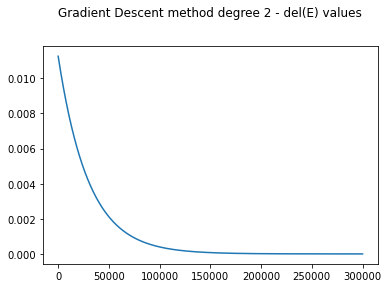

In [95]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [96]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.317670187551533

In [97]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9502648807923055

In [98]:
degree = 3

In [99]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.304691270673135
w1=0.9988807591444524
w2=1.6987562668793301
w3=0.3019231417601625
w4=0.5134685241311927
w5=0.873235233763276
w6=0.09125972514316939
w7=0.15520173812681137
w8=0.26394534368575234
w9=0.44888121289254945


436

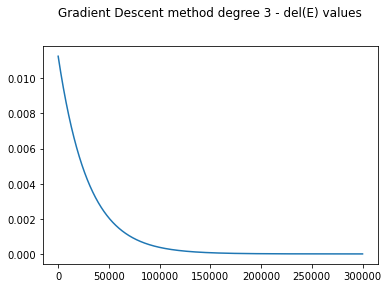

In [100]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [101]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.282299222766008

In [102]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9206955709545273

In [103]:
degree = 4

In [104]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.288285949436887
w1=0.993922063039945
w2=1.690323212176855
w3=0.3004243191097129
w4=0.5109195368300703
w5=0.8689002737469436
w6=0.09080668884286858
w7=0.15443127754157832
w8=0.26263505240668095
w9=0.4466528532996911
w10=0.02744736099607855
w11=0.04667862112122557
w12=0.07938445047924222
w13=0.13500593690470641
w14=0.2295991581409794


436

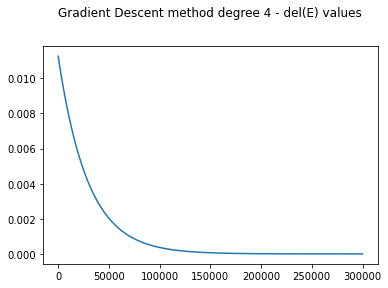

In [105]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [106]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.273695502173305

In [107]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9130237591952173

In [108]:
degree = 5

In [109]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.283964143162303
w1=0.9926157476298498
w2=1.6881016141842293
w3=0.3000294703260607
w4=0.5102480334103543
w5=0.8677582749327122
w6=0.09068734127891752
w7=0.15422830794753126
w8=0.2622898701947767
w9=0.44606581581766613
w10=0.02741128682893012
w11=0.046617271238413964
w12=0.0792801152050367
w13=0.13482849810704697
w14=0.22929739512596972
w15=0.008285375169472114
w16=0.014090603772008258
w17=0.02396332219104399
w18=0.040753456681005384
w19=0.06930776201270367
w20=0.11786891877195005


436

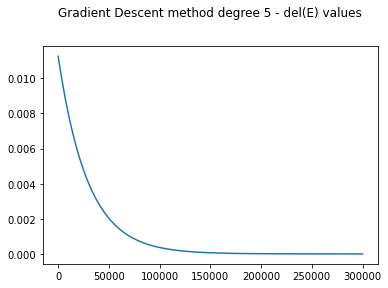

In [110]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [111]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.271942832845424

In [112]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.910878285961985

In [113]:
degree = 6

In [114]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.282822762415471
w1=0.9922707522358185
w2=1.6875148944158436
w3=0.2999251915197096
w4=0.5100706906452821
w5=0.8674566752364757
w6=0.09065582181621805
w7=0.15417470406708328
w8=0.26219870823473856
w9=0.44591078034473025
w10=0.027401759710583798
w11=0.0466010688520478
w12=0.07925256045926005
w13=0.13478163686094935
w14=0.22921770009255688
w15=0.008282495488913562
w16=0.01408570641529023
w17=0.023954993453763822
w18=0.040739292333041584
w19=0.06928367327673371
w20=0.11782795202911175
w21=0.002503479055667102
w22=0.004257565976601881
w23=0.007240670939141355
w24=0.012313917373693412
w25=0.0209417832077495
w26=0.03561484705568377
w27=0.060568735633279164


436

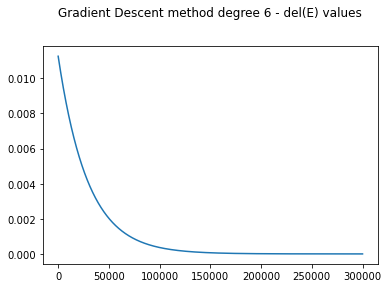

In [115]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [116]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.271816398432907

In [117]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.91021055384821

In [118]:
degree = 7

In [119]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.282521178476908
w1=0.9921795950388179
w2=1.6873598670431507
w3=0.29989763821358106
w4=0.5100238318475715
w5=0.8673769843669099
w6=0.09064749351409217
w7=0.15416054045916738
w8=0.2621746207573494
w9=0.44586981574229745
w10=0.02739924238594782
w11=0.04659678773944952
w12=0.07924527974353161
w13=0.13476925484102245
w14=0.22919664249007304
w15=0.008281734598731235
w16=0.0140844124000098
w17=0.02395279277410754
w18=0.04073554972580252
w19=0.06927730837537903
w20=0.11781712749777896
w21=0.00250324906790113
w22=0.00425717484567328
w23=0.007240005758527713
w24=0.012312786127821287
w25=0.020939859343467856
w26=0.03561157521719843
w27=0.06056317134937819
w28=0.00075663568075554
w29=0.0012867798209756597
w30=0.0021883746032394947
w31=0.00372168052843134
w32=0.0063293121457364074
w33=0.010764006188100186
w34=0.018305911693028865
w35=0.031132126557434147


436

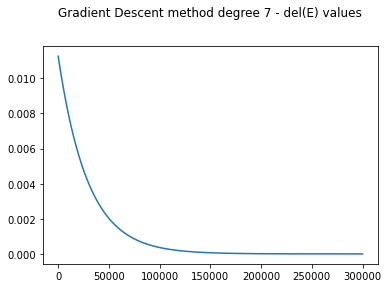

In [120]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [121]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.2719944526314952

In [122]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9099800949429628

In [123]:
degree = 8

In [124]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.2824414862003954
w1=0.99215550713616
w2=1.6873189017175543
w3=0.29989035736934466
w4=0.5100114496090521
w5=0.8673559263926973
w6=0.09064529279558926
w7=0.15415679778585653
w8=0.2621682557436266
w9=0.44585899101987003
w10=0.027398577193589693
w11=0.04659565647360621
w12=0.07924335584528702
w13=0.13476598294478512
w14=0.22919107810794084
w15=0.008281533536728036
w16=0.014084070461961983
w17=0.02395221125384285
w18=0.04073456075771667
w19=0.06927562647719408
w20=0.11781426716129441
w21=0.0025031882946093954
w22=0.004257071490984603
w23=0.0072398299873722045
w24=0.012312487200898099
w25=0.02093935097049184
w26=0.035610710647759836
w27=0.060561701010962414
w28=0.0007566173113325985
w29=0.0012867485808381674
w30=0.002188321474395951
w31=0.003721590174347472
w32=0.006329158484186444
w33=0.010763744862092257
w34=0.01830546726641322
w35=0.0311313707389947
w36=0.00022869624192513316
w37=0.0003889344855484192
w38=0.0006614452112349721
w39=0.0011248932242374382
w40=0.0019130605898146007
w41=0

436

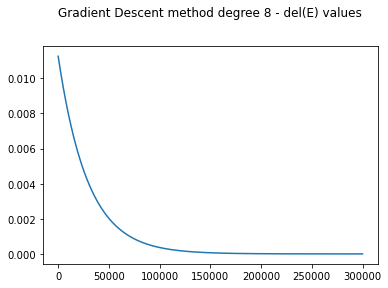

In [125]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [126]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.272168707273445

In [127]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9098940847960315

In [128]:
degree = 9

In [129]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.282420427898675
w1=0.9921491420233909
w2=1.6873080768267057
w3=0.29988843344116656
w4=0.510008177661913
w5=0.86735036192398
w6=0.09064471126627593
w7=0.15415580880238236
w8=0.2621665738192763
w9=0.4458561306388886
w10=0.02739840141970146
w11=0.04659535754203307
w12=0.07924284746440431
w13=0.13476511836189242
w14=0.2291896077466488
w15=0.008281480407058324
w16=0.01408398010647197
w17=0.02395205758990239
w18=0.04073429942764198
w19=0.06927518204366419
w20=0.11781351133109941
w21=0.00250317223555868
w22=0.0042570441800037955
w23=0.007239783540687497
w24=0.01231240821089252
w25=0.020939216635371367
w26=0.035610482189433426
w27=0.06056131248109014
w28=0.0007566124573007241
w29=0.0012867403257815979
w30=0.0021883074353540623
w31=0.0037215662987144763
w32=0.006329117879858458
w33=0.010763675807947794
w34=0.01830534982881271
w35=0.031131171017596822
w36=0.00022869477473843607
w37=0.0003889319903631039
w38=0.0006614409677738566
w39=0.0011248860075540586
w40=0.0019130483166918942
w41=0.0032

436

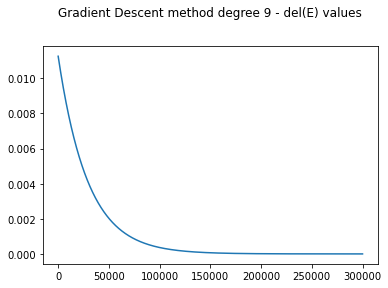

In [130]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [131]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.272288342383404

In [132]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.9098603771359277

In [133]:
TrainErr

array([1.45674594, 1.22549228, 1.15883509, 1.14114961, 1.13684775,
       1.13597142, 1.1359082 , 1.13599723, 1.13608435, 1.13614417])

In [134]:
TestErr

array([1.24616371, 1.03278895, 0.97513244, 0.96034779, 0.95651188,
       0.95543914, 0.95510528, 0.95499005, 0.95494704, 0.95493019])

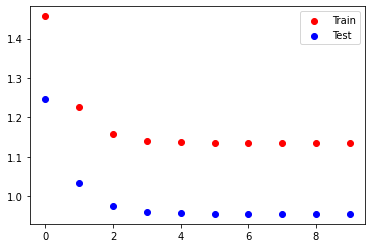

In [135]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

w0=4.904955914508465


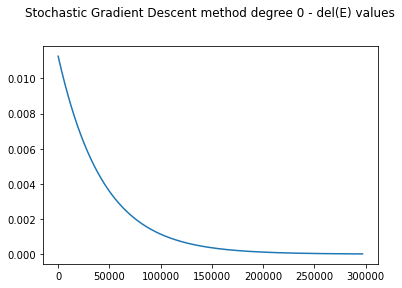

In [136]:
# degree 0
iters = 3000
learningRate = 0.01
degree = 0
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[k,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 0 - del(E) values", y = 1, pad = 30)
plt.show()  

w0=8.555202128686382
w1=4.328498992358886
w2=10.601821728253915


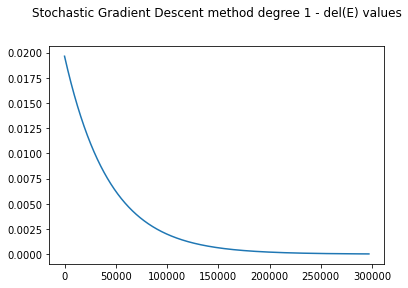

In [137]:
# degree 1
iters = 3000
learningRate = 0.01
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 1 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=4.863314097505556
w2=9.736553031068222
w3=3.841504434958001
w4=5.2581921059309895
w5=5.875311718727221


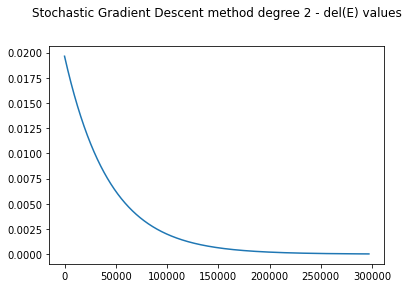

In [138]:
# degree 2
iters = 3000
learningRate = 0.01
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 2 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=3.1849177998136433
w2=9.596127679739626
w3=1.0272200515178054
w4=3.025134064366048
w5=5.906598108952527
w6=0.12580425833462774
w7=0.6106307496940493
w8=2.336620003173845
w9=5.893043065344161


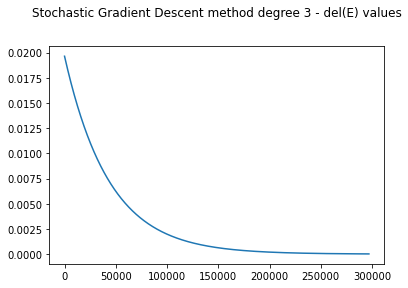

In [139]:
# degree 3
iters = 3000
learningRate = 0.01
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 3 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=3.9990412610443724
w2=10.582334276805232
w3=1.8760883438144267
w4=3.3091639744848815
w5=5.1457403977688525
w6=0.31335994829823977
w7=0.9118941222864327
w8=2.103235494473135
w9=3.703063130640017
w10=0.16362604556397836
w11=0.15383508781997277
w12=0.7061206663893784
w13=1.6928003352692775
w14=2.2706718949555484


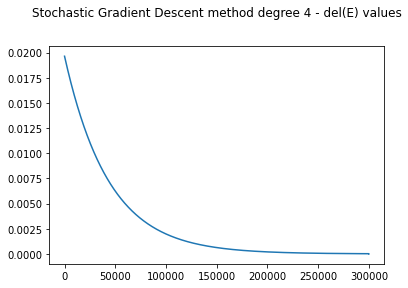

In [140]:
# degree 4
iters = 300000
learningRate = 0.01
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 4 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=1.2709032143224286
w2=10.502725634559813
w3=0.13935529885652892
w4=0.9594687015540326
w5=5.272649654461186
w6=0.006261948040855273
w7=0.06886758764032963
w8=0.6046707554876115
w9=3.931178842815916
w10=0.0008867809952950106
w11=0.003145020400597753
w12=0.05447958780100396
w13=0.4938444257436213
w14=2.4819409254391367
w15=6.351068439341882e-06
w16=0.00045879514690649637
w17=0.002867264122167936
w18=0.02706896728306351
w19=0.1979159044913216
w20=1.7945682873182363


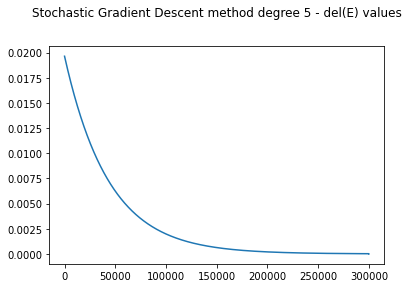

In [141]:
# degree 5
iters = 300000
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 5 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=4.841066425882398
w2=7.92011592926851
w3=3.750875704087069
w4=6.205905554487977
w5=5.084943355541906
w6=0.92191884006575
w7=2.8806607331695204
w8=6.457002710269625
w9=6.647790568532642
w10=0.6928013900288904
w11=0.7113977827742183
w12=3.526265278944806
w13=8.5114689866185
w14=7.821365776745621
w15=0.026245116008494433
w16=0.5500304704179515
w17=0.9960055149311656
w18=2.703416349316682
w19=5.416175210170158
w20=10.260717801172683
w21=0.04265798313071914
w22=0.1135724649106329
w23=0.2876177691890385
w24=0.5087235525449744
w25=1.5948041254360752
w26=2.5411218276710765
w27=7.332980699258328


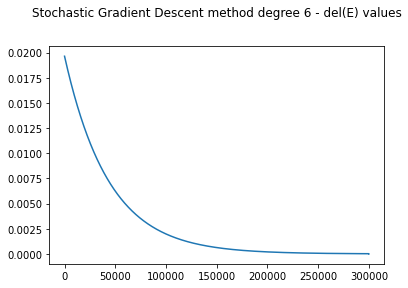

In [142]:
# degree 6
iters = 300000
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 6 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=4.921965151835296
w2=10.023017037717109
w3=4.108714787996036
w4=5.2009316135429415
w5=5.746494076024088
w6=1.0686786155998942
w7=2.3306880366180205
w8=3.97675486525853
w9=5.0822245955619785
w10=0.8450214369419613
w11=0.5999779588637147
w12=2.075486276390972
w13=3.730165280318995
w14=3.711758061062589
w15=0.033649013102357045
w16=0.48717837190817614
w17=0.610033479694607
w18=1.1529102501475548
w19=1.6832270444449764
w20=3.0416927524086854
w21=0.057480730750310564
w22=0.10571509282034737
w23=0.1849540417652902
w24=0.22616582653499762
w25=0.49255286909186247
w26=0.5624334369268351
w27=1.4022423332014604
w28=0.022610249595117125
w29=0.0500278653612595
w30=0.04868869443369245
w31=0.05150629778122855
w32=0.19827304175454583
w33=0.13495263420834583
w34=0.44588915652181327
w35=0.8311311605255178


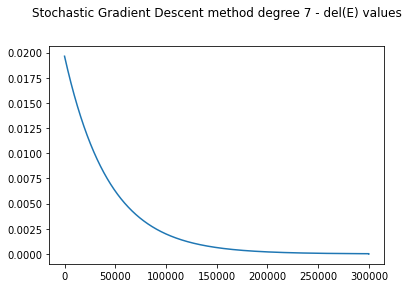

In [143]:
# degree 7
iters = 300000
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 7 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=4.543270766876273
w2=10.240761184556943
w3=2.8515460233823027
w4=4.308144208466923
w5=5.580012787916682
w6=0.5973870433778637
w7=1.5234966155325738
w8=3.0571959514470217
w9=4.596535408805949
w10=0.3873726815866298
w11=0.3200807549496337
w12=1.2902107528593472
w13=2.708765489614869
w14=3.1554787768980477
w15=0.01268542723263655
w16=0.21358085360858317
w17=0.3110672323837877
w18=0.6841185097417565
w19=1.1634789452101633
w20=2.4525078752878695
w21=0.017827565392813407
w22=0.03812455346496158
w23=0.07756058266808538
w24=0.11029211203676433
w25=0.279375574246484
w26=0.3711935815372944
w27=1.0775547237785432
w28=0.005769434115509716
w29=0.014843362612109693
w30=0.016797412044888084
w31=0.02066201111531653
w32=0.09248792827255596
w33=0.07320497816396723
w34=0.2813142623191306
w35=0.6100545799986514
w36=0.00014606873852844447
w37=0.002830351372078838
w38=0.003389203317942453
w39=0.010415668091305855
w40=0.01572063074201615
w41=0.035112469473192465
w42=0.0773828359130420

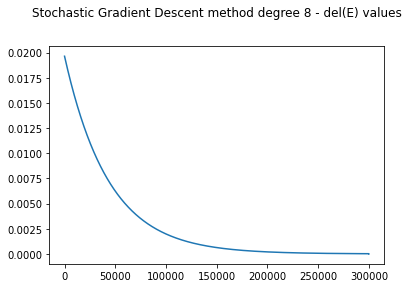

In [144]:
# degree 8
iters = 300000
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 8 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=8.555202128686382
w1=4.916143213864728
w2=9.212047654822086
w3=8.014403238839956
w4=7.042278617706551
w5=5.89874966248947
w6=3.7382717391206897
w7=5.800192976411474
w8=6.998288723333342
w9=6.451927958927082
w10=4.825120975016108
w11=2.494978795172706
w12=6.249826247421148
w13=8.087929772008293
w14=5.8027647462979335
w15=0.30301788376284783
w16=3.22210110975364
w17=2.9571073562635304
w18=4.084135118491432
w19=4.3421874826588915
w20=5.7022120078764
w21=0.8077776670253792
w22=1.0939105024459443
w23=1.4083495302247695
w24=1.2660527137246607
w25=2.0240865898211178
w26=1.6934193775825608
w27=3.0876417340246083
w28=0.4943326302518437
w29=0.8059834192662967
w30=0.5779137927856877
w31=0.45028695410095754
w32=1.2761097061642104
w33=0.6389976367601194
w34=1.5517136460944576
w35=2.1233306846750133
w36=0.023645510169902448
w37=0.29042414025660057
w38=0.22042869438055382
w39=0.42933745287427943
w40=0.41064146657219
w41=0.581083848594845
w42=0.8110600655386989
w43=1.455938066333514
w44=1.915684006

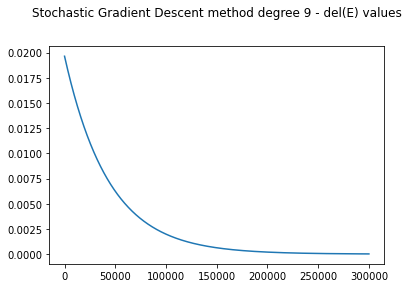

In [145]:
# degree 9
iters = 300000
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += ((((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0])
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-10])
plt.title("Stochastic Gradient Descent method degree 9 - del(E) values", y = 1, pad = 30)
plt.show() 